<a href="https://colab.research.google.com/github/Ahmed1Rabie/Machine-Learning-Models/blob/main/Customer_churn_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer churn prediction using ANN

### import important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### import our dataset

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


drop customerID Colm because it is ineffective

In [3]:
df.drop("customerID",axis=1,inplace=True)


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges         

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

### We note that the data type of TotalCharges is string Even though it means Continuous Data so we should convert it into a numeric


In [6]:
x="5"
u=pd.to_numeric(x)
u.dtype

dtype('int64')

In [7]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges.dtypes

dtype('float64')

In [8]:

#check null values and drop it 
print(df.shape)
null_of_TotalCharges=df.loc[df.TotalCharges.isnull()].index
print(null_of_TotalCharges)
df.drop(null_of_TotalCharges, axis=0, inplace=True)


(7043, 20)
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [9]:
print(df.shape)

(7032, 20)


corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (30, 30))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

### data visulaization

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

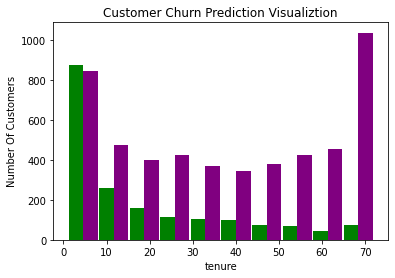

In [10]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','purple'],label=['Churn=Yes','Churn=No'])

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 Lists of Patches objects>)

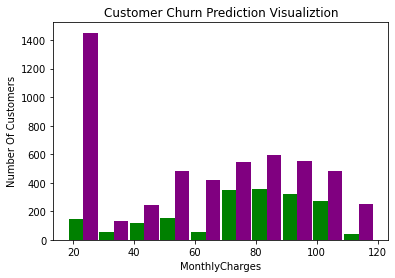

In [11]:
tenure_churn_no = df[df.Churn=='No'].MonthlyCharges
tenure_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','purple'],label=['Churn=Yes','Churn=No'])

### get value_counts for object columns

In [12]:
for i in df:
    if df.dtypes[i]=="object":
      print(i, "value_counts \n")
      print(df[i].value_counts())
      print("------------")

gender value_counts 

Male      3549
Female    3483
Name: gender, dtype: int64
------------
Partner value_counts 

No     3639
Yes    3393
Name: Partner, dtype: int64
------------
Dependents value_counts 

No     4933
Yes    2099
Name: Dependents, dtype: int64
------------
PhoneService value_counts 

Yes    6352
No      680
Name: PhoneService, dtype: int64
------------
MultipleLines value_counts 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
------------
InternetService value_counts 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
------------
OnlineSecurity value_counts 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
------------
OnlineBackup value_counts 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
------------
DeviceProtection 

### Replace some values ​​to make the model easy to train it

In [13]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

### encode categorical data

#### encode binary categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Partner.value_counts())
binary_categorical_data = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn',"gender"]

for col in binary_categorical_data:
  df[col]=le.fit_transform(df[col])
print(df.Partner.value_counts()) #Verify that is encoding done

0    3639
1    3393
Name: Partner, dtype: int64
0    3639
1    3393
Name: Partner, dtype: int64


#### One hot encoding for categorical columns


In [22]:
print(df.shape)
new_df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
print(new_df.shape)
print(new_df.columns)

(7032, 20)
(7032, 27)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


#### scaling our data 

In [25]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
print("first 10th values of tenure before scale",new_df.tenure[0:10])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])
print("first 10th values of tenure after scale",new_df.tenure[0:10])

first 10th values of tenure before scale 0    0.000000
1    0.464789
2    0.014085
3    0.619718
4    0.014085
5    0.098592
6    0.295775
7    0.126761
8    0.380282
9    0.859155
Name: tenure, dtype: float64
first 10th values of tenure after scale 0    0.000000
1    0.464789
2    0.014085
3    0.619718
4    0.014085
5    0.098592
6    0.295775
7    0.126761
8    0.380282
9    0.859155
Name: tenure, dtype: float64


### split data

In [26]:
X = new_df.drop('Churn',axis='columns')
y = new_df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,shuffle=True)


In [28]:
print(X_train.shape,y_train.shape)

(5625, 26) (5625,)


In [29]:
print(X_test.shape,y_test.shape)

(1407, 26) (1407,)


In [30]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


### build model 

In [44]:
model=keras.Sequential([
keras.layers.Dense(26,input_shape=(26,),activation="relu"),
keras.layers.Dense(10,activation="relu"),
keras.layers.Dense(5,activation="relu"),
keras.layers.Dense(1,activation="sigmoid")  
])

model.compile(
optimizer="adam",
loss="binary_crossentropy"    ,
metrics="accuracy"

)

model.fit(X_train,y_train,epochs=1000)


Epoch 1/1000
176/176 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7525
Epoch 2/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7961
Epoch 3/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8027
Epoch 4/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8068
Epoch 5/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8082
Epoch 6/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8107
Epoch 7/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8108
Epoch 8/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8117
Epoch 9/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8110
Epoch 10/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.403

### model evalute

In [45]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.8980 - accuracy: 0.7413


[0.8980381488800049, 0.7412935495376587]

In [46]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[3.8033733e-01],
       [5.7825959e-01],
       [5.6047837e-04],
       [9.8339021e-01],
       [7.5953007e-01]], dtype=float32)

In [47]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [49]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       999
           1       0.56      0.52      0.54       408

    accuracy                           0.74      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.74      0.74      0.74      1407



Text(69.0, 0.5, 'Truth')

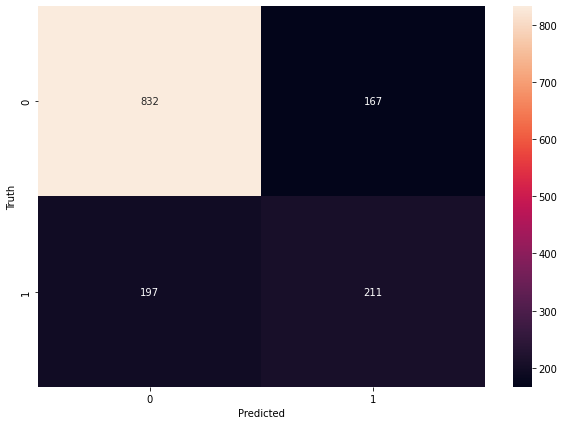

In [50]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# finaly i now randomforest is the best model to train on this data I built the neural network to train on it only as I watched in the course